# 手动实现超参数搜索

In [1]:
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import sys
import os
import time

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

读取所用的数据

In [2]:
housing = fetch_california_housing()
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data,
                                                           housing.target,
                                                           test_size=0.25,
                                                           random_state=7)
x_train, x_val, y_train, y_val = train_test_split(x_train_all,
                                                  y_train_all,
                                                  test_size=0.25,
                                                  random_state=7)
print("train shape: ", x_train.shape)
print("validation shape: ", x_val.shape)
print("test shape: ", x_test.shape)

train shape:  (11610, 8)
validation shape:  (3870, 8)
test shape:  (5160, 8)


做归一化

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

构建模型

In [4]:
# 只对learning_rate做超参搜索

learning_rate = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rate:
    model = keras.models.Sequential([
        keras.layers.Input(shape=x_train.shape[1:]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.SGD(lr=lr)
    model.compile(optimizer=optimizer,loss='mse')
    history = model.fit(x_train_scaled,
                    y_train,
                    epochs=10,
                    validation_data=(
                        x_val_scaled,
                        y_val))
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 81us/sample - loss: 4.2463 - val_loss: 3.3870
Epoch 2/10
11610/11610 [==============================] - 1s 56us/sample - loss: 2.7654 - val_loss: 2.2654
Epoch 3/10
11610/11610 [==============================] - 1s 50us/sample - loss: 1.9685 - val_loss: 1.6372
Epoch 4/10
11610/11610 [==============================] - 1s 46us/sample - loss: 1.5166 - val_loss: 1.2837
Epoch 5/10
11610/11610 [==============================] - 1s 47us/sample - loss: 1.2486 - val_loss: 1.0836
Epoch 6/10
11610/11610 [==============================] - 1s 46us/sample - loss: 1.0769 - val_loss: 0.9596
Epoch 7/10
11610/11610 [==============================] - 1s 48us/sample - loss: 0.9625 - val_loss: 0.8804
Epoch 8/10
11610/11610 [==============================] - 1s 48us/sample - loss: 0.8835 - val_loss: 0.8260
Epoch 9/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.8273 - val_l

画出各指标的变化趋势

Learning Rate:  0.0001


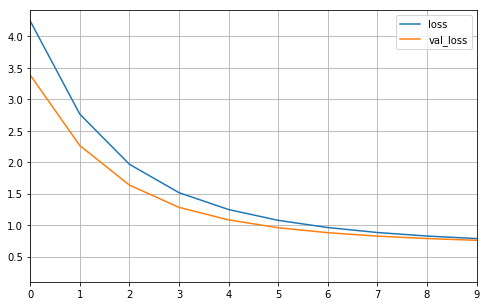

Learning Rate:  0.0003


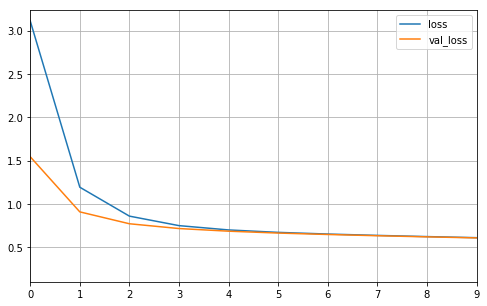

Learning Rate:  0.001


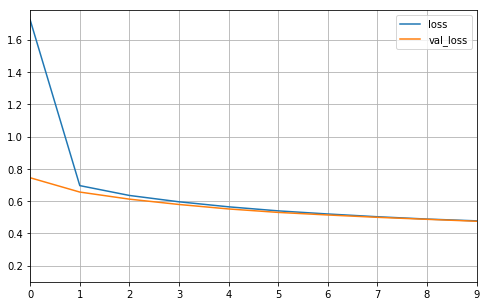

Learning Rate:  0.003


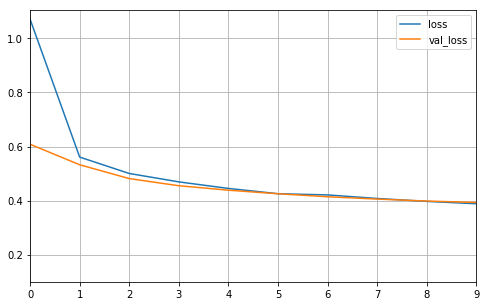

Learning Rate:  0.01


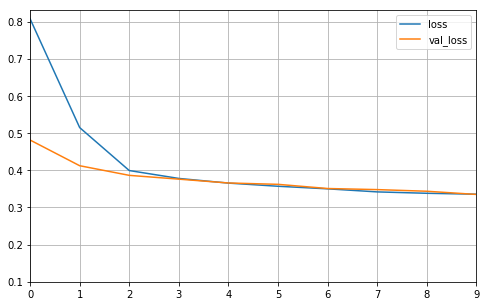

Learning Rate:  0.03


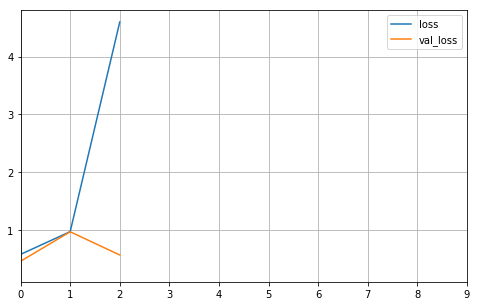

In [7]:
def curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0.1)
    plt.show()
for lr, history in zip(learning_rate, histories):
    print("Learning Rate: ", lr)
    curves(history)